# Lab 6.01 - Regression analysis

In [60]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [61]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv').set_index('ID')
# Show the first few records of the Data Frame
cats.head()

,Sex,Hwt,Bwt
ID,,,
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3


2. Draw a scatter plot of both variables.


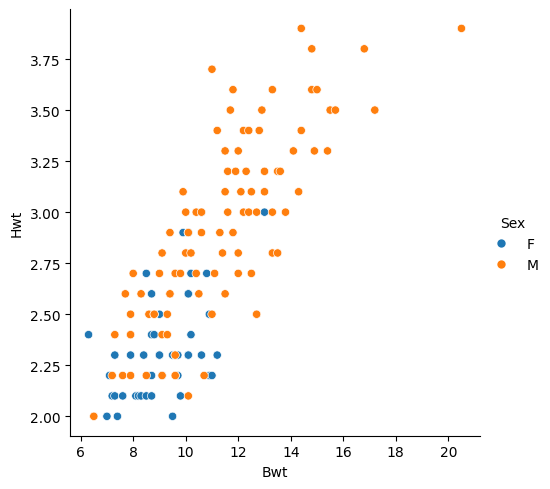

In [ ]:
sns.relplot(data=cats,x='Bwt', y='Hwt',hue='Sex');

3. Calculate and draw the regression line.


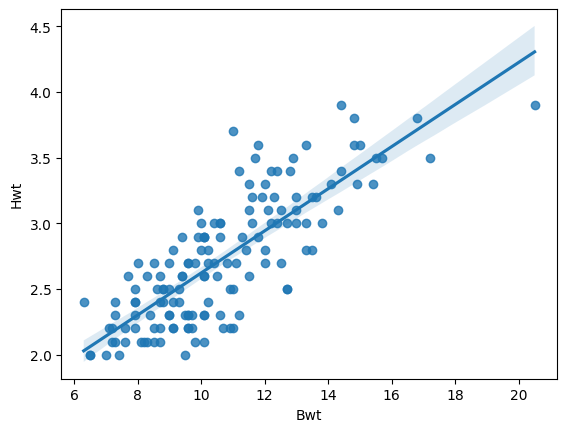

In [63]:
sns.regplot(data=cats, x='Bwt', y='Hwt');
# sns.lmplot(data=cats,x='Bwt',y='Hwt')

4. Calculate the correlation coefficient and the coefficient of determination.

In [64]:
cor = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

R = 0.804134787315513
R² = 0.6466327561709654


5. Interpret the results from the previous steps.

R > 0 => stijgend verband

|R| ≈ 0.8 => sterk verband

R^2 ≈ 0.64 => 64% van de variantie in Bwt wordt verklaard door Hwt


### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [65]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


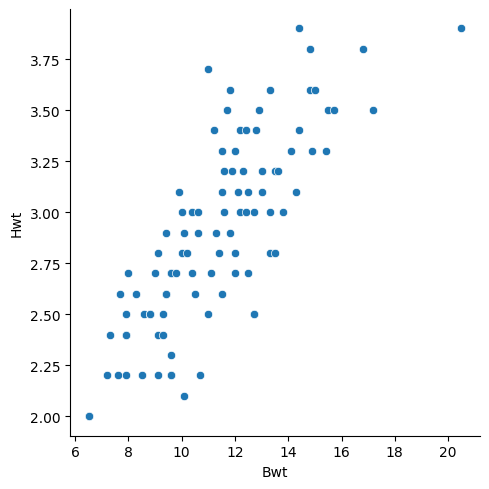

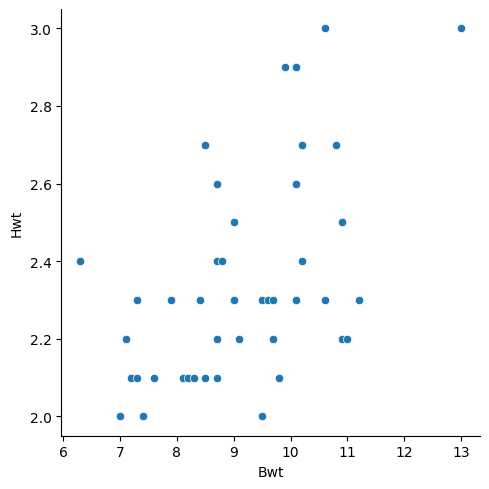

In [66]:
sns.relplot(data=cats[cats.Sex == 'M'],x='Bwt', y='Hwt');
sns.relplot(data=cats[cats.Sex =='F'],x='Bwt', y='Hwt');

3. Calculate and draw the regression line.


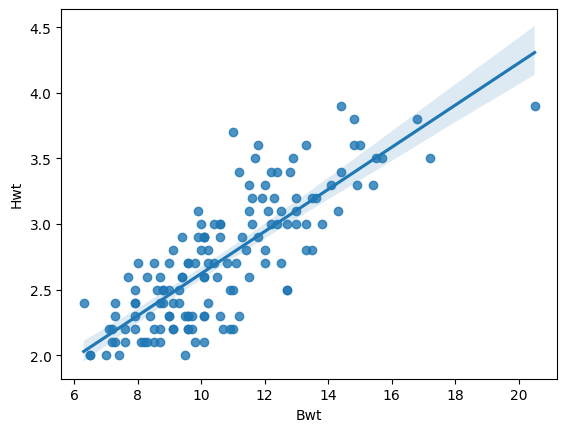

In [67]:
sns.regplot(data=cats, x='Bwt', y='Hwt');
# sns.lmplot(data=cats,x='Bwt',y='Hwt')

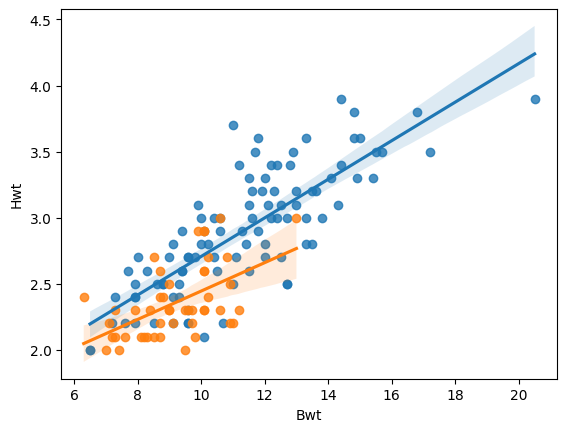

In [68]:
sns.regplot(data=cats[cats.Sex == 'M'], x='Bwt', y='Hwt');
sns.regplot(data=cats[cats.Sex =='F'], x='Bwt', y='Hwt');


4. Calculate the correlation coefficient and the coefficient of determination.


In [69]:
cor = np.corrcoef(cats[cats.Sex=='M']['Hwt'], cats[cats.Sex=='M']['Bwt'])[0,1]
print(f"Male: R ≈ {cor}")
print(f"Male: R ≈ {cor**2}")

Male: R ≈ 0.7930443171812299
Male: R ≈ 0.6289192890134432


In [70]:
cor = np.corrcoef(cats[cats.Sex=='F']['Hwt'], cats[cats.Sex=='F']['Bwt'])[0,1]
print(f"Female: R ≈ {cor}")
print(f"Female: R ≈ {cor**2}")

Female: R ≈ 0.5320496665060397
Female: R ≈ 0.28307684762918806


5. Interpret the results from the previous steps.

### Female: 

- R > 0 => stijgend verband
- |R| ≈ 0.53 => gemiddeld verband
- R**2 ≈ 0.28 => 28% van de variantie in Bwt wordt verklaard door Hwt

### Male: 
- R > 0 => stijgend verband
- |R| ≈ 0.8 => sterk verband
- R**2 ≈ 0.62 => 62% van de variantie in Bwt wordt verklaard door Hwt

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |
